In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
hotels = pd.read_excel("D:/STUDIES/Data Visualization/Data/HotelCustomersDataset.xlsx")

In [3]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
hotels = hotels.assign(date = pd.to_datetime("2018-12-31") - pd.to_timedelta(hotels["DaysSinceCreation"], unit='D'),
                      total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"]
                      )
monthly_revenue = hotels.groupby('date').agg({"LodgingRevenue":"sum", "OtherRevenue":"sum", "total_revenue":"sum"})\
                    .resample("M").sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_137932\1237553153.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M").sum()


In [5]:
monthly_revenue.head()

,LodgingRevenue,OtherRevenue,total_revenue
date,,,
2016-01-31,124531.34,52190.50,176721.84
2016-02-29,131689.12,51203.13,182892.25
2016-03-31,443476.86,127336.11,570812.97
2016-04-30,500966.80,145228.87,646195.67
2016-05-31,634200.17,143359.35,777559.52


In [6]:
rev_by_country = (
    hotels.groupby("Nationality").agg({"total_revenue":"sum"}).sort_values("total_revenue", ascending=False).iloc[:5]
)
rev_by_country.head()

,total_revenue
Nationality,
FRA,4842481.89
DEU,3838924.08
PRT,3380643.30
GBR,3284336.38
ESP,1795750.15


In [7]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set2.colors)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Percent of 2018 Frence revenue Goal Met')

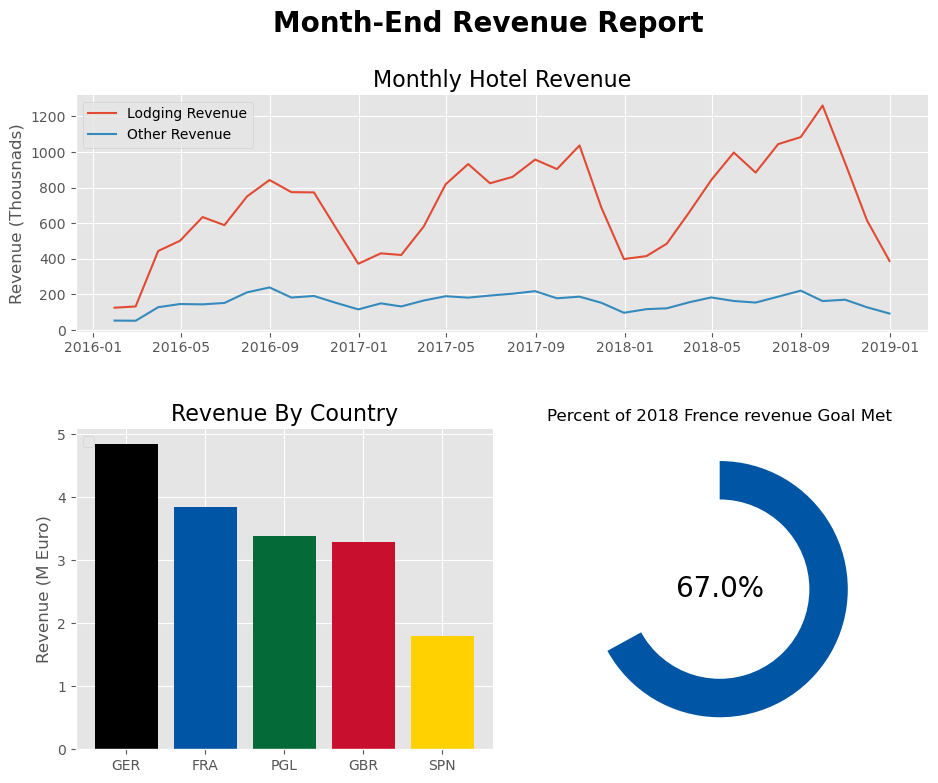

In [10]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(11,8.5))

gs = GridSpec(8, 8)

fig.suptitle("Month-End Revenue Report", fontsize = 20, fontweight='bold')

ax1 = fig.add_subplot(gs[0:3,:])
ax1.plot(
    monthly_revenue.index,
    monthly_revenue["LodgingRevenue"]/1000,
    label="Lodging Revenue"
)
ax1.plot(
    monthly_revenue.index,
    monthly_revenue["OtherRevenue"]/1000,
    label="Other Revenue"
)
ax1.set_title("Monthly Hotel Revenue", fontsize=16)
ax1.set_ylabel("Revenue (Thousnads)")
ax1.legend(loc="upper left")
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)


color = ["black", "#0055A4","#046A38","#C8102E","#FFD100"]
ax2 = fig.add_subplot(gs[4:,0:4])
ax2.bar(
    x = rev_by_country.index,
    height = rev_by_country["total_revenue"] / 1000000,
    color=color
)

ax2.set_title("Revenue By Country", fontsize=16)
ax2.set_xticks(range(len(rev_by_country.index)))
ax2.set_xticklabels(["GER", "FRA", "PGL", "GBR", "SPN"])
ax2.set_ylabel("Revenue (M Euro)")
ax2.legend(loc="upper left")
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)



ax3 = fig.add_subplot(gs[4:,4:8])
pie_list = [0.33, 0.67]
ax3.pie(
    pie_list,
    startangle=90,
    labels=["", ""],
    colors=["white", "#0055A4"],
    pctdistance=.85
)

hole = plt.Circle((0,0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(hole)
plt.text(
    0,0,
    f"{pie_list[1] * 100}%",
    ha="center",
    va = "center",
    fontsize=20
)
ax3.set_title("Percent of 2018 Frence revenue Goal Met", fontsize=12)
